In [26]:
import tensorflow as tf

In [27]:
import matplotlib.pyplot as plt 

In [28]:
import os 
print("current Dir", os.getcwd())
curr_dir = os.getcwd()


current Dir c:\Users\happy\Desktop\AICTE\Potato Leaf


In [29]:
# data is split into training, testing, and validation sets.


train_path = os.path.join(curr_dir,"dataset","Train")
testing_path = os.path.join(curr_dir,"dataset","Test")
valid_path = os.path.join(curr_dir,"dataset","valid")
print(valid_path)
print(testing_path)
print(train_path)

c:\Users\happy\Desktop\AICTE\Potato Leaf\dataset\valid
c:\Users\happy\Desktop\AICTE\Potato Leaf\dataset\Test
c:\Users\happy\Desktop\AICTE\Potato Leaf\dataset\Train


In [30]:


training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,               # ✅ Directory containing images organized in subfolders (each subfolder = a class)
    labels='inferred',        # ✅ Automatically assigns labels based on subfolder names
    label_mode='categorical', # ✅ Converts labels to one-hot encoding (for multi-class classification)
    color_mode='rgb',         # ✅ Loads images in RGB format (default: 'grayscale' also available)
    image_size=(128, 128),    # ✅ Resizes all images to 128x128 pixels
    shuffle=True,             # ✅ Randomly shuffles images to avoid order bias
    interpolation='bilinear'  # ✅ Rescales images using bilinear interpolation (avoids distortion)
)


Found 900 files belonging to 3 classes.


In [31]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [32]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,               # ✅ Path to validation dataset directory
    labels='inferred',        # ✅ Automatically assigns labels based on folder names
    label_mode='categorical', # ✅ Converts labels to one-hot encoding for multi-class classification
    color_mode='rgb',         # ✅ Loads images in RGB format (default is 'grayscale' also available)
    image_size=(128, 128),    # ✅ Resizes images to 128x128 pixels (must match training size)
    shuffle=True,             # ✅ Shuffles images for unbiased validation
    interpolation='bilinear'  # ✅ Uses bilinear interpolation for smooth resizing
)


Found 300 files belonging to 3 classes.


In [33]:
# This is a Convolutional Neural Network (CNN) model for image classification.
# The model consists of several convolutional layers for feature extraction, followed by max-pooling layers to reduce the spatial dimensions of the input images. 
# Dropout layers are used to prevent overfitting by randomly setting a fraction of the inputs to zero during training.
# The model ends with a fully connected (dense) layer for classification, with the final output layer using a softmax activation function to output class probabilities.
# The input image size is 128x128 pixels, with 3 color channels (RGB), and the model classifies images into 3 categories (units=3).




cnn = tf.keras.models.Sequential()

# 1ST CONVOLUTION BLOCK

# 1st convolutin layer 
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
#filters=32 = filters meaing kernal in our modle i make 32 kernal size ok 3*3 matrix
#input_shape=[128,128,3] = 128*128 (pixal size), 3 = RBG (colour)

# 2nd convolutin layer 
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))

# 3rd convolutin layer 
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
# Max Pool to extract most imp feature in it , take max value frm pixal 
#pool size = 2*2 MAX Pool matrix 
#strides = 2 means move max pool matrix by 2 on orignal img matrix

# 2ND CONVOLUTION BLOCK 

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
#increas size of kernal to take more complex details of img 

# 3RD CONVOLUTION BLOCK
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
#increas size of kernal to take more complex details of img

#4TH CONVOLUTION BLOCK
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
#increas size of kernal to take more complex details of img 
# 5TH CONVOLUTION BLOCK
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
#increas size of kernal to take more complex details of img

cnn.add(tf.keras.layers.Dropout(0.25))
# Dropout to prevent overfitting

cnn.add(tf.keras.layers.Flatten())
# Flatten to convert 3D array to 1D array
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))
# Dense layer to output 3 classes (0, 1, 2) 
# softmax activation function use in muilti class detection (  output activatin functin)




c:\Users\happy\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Compile the CNN model with the Adam optimizer, which is adaptive and commonly used for training deep neural networks.
# The learning rate is set to 0.0001 to control how much the model weights are updated during training.
# The loss function used is 'categorical_crossentropy', suitable for multi-class classification problems (since there are 3 classes).
# The metric 'accuracy' is tracked during training to evaluate the model's performance on the training and validation datasets.

cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
# Displays the summary of the CNN model architecture, including the details of each layer (type, output shape, number of parameters).
# This is useful for understanding the structure of the model, including the number of layers, the number of parameters in each layer,
# and the overall model's total trainable parameters.

cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Train the CNN model using the training dataset (`training_set`) and validate its performance on the validation dataset (`validation_set`).
# The model will be trained for 10 epochs, which means the entire training dataset will be processed 10 times.
# The `fit()` function automatically handles the optimization process, updating the model's weights to minimize the loss function.
# During each epoch, the model's accuracy and loss will be tracked for both the training and validation datasets.

training_history= cnn.fit(x=training_set,validation_data=validation_set,epochs=50)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.3770 - loss: 1.1835 - val_accuracy: 0.7300 - val_loss: 0.7643
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.6920 - loss: 0.7265 - val_accuracy: 0.7033 - val_loss: 0.6379
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.7421 - loss: 0.5690 - val_accuracy: 0.7900 - val_loss: 0.5209
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8112 - loss: 0.4409 - val_accuracy: 0.8767 - val_loss: 0.3039
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8638 - loss: 0.3183 - val_accuracy: 0.8333 - val_loss: 0.3694
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.8960 - loss: 0.2765 - val_accuracy: 0.9333 - val_loss: 0.1669
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 0.9374 - loss: 0.1695 - val_accuracy: 0.8900 - val_loss: 0.3440
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.9002 - loss: 0.2513 - val_accuracy: 0.8267 - val_loss:

In [39]:
train_loss,train_acc = cnn.evaluate(training_set)
print('Training accuracy: ',train_acc)

29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 246ms/step - accuracy: 1.0000 - loss: 9.6406e-06
Training accuracy:  1.0


In [40]:
valid_loss,valid_acc = cnn.evaluate(validation_set)
print('Validation accuracy: ',valid_acc)

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 250ms/step - accuracy: 0.9771 - loss: 0.1089
Validation accuracy:  0.9733333587646484


In [41]:
cnn.save('trained_plant_disease_model.keras')

In [42]:
training_history.history

{'accuracy': [0.43666666746139526,
  0.6755555272102356,
  0.7522222399711609,
  0.8188889026641846,
  0.8766666650772095,
  0.9144444465637207,
  0.9422222375869751,
  0.897777795791626,
  0.9222221970558167,
  0.9255555272102356,
  0.9477777481079102,
  0.9599999785423279,
  0.9599999785423279,
  0.9622222185134888,
  0.9800000190734863,
  0.995555579662323,
  0.9888888597488403,
  0.9911110997200012,
  0.9544444680213928,
  0.9544444680213928,
  0.9722222089767456,
  0.9911110997200012,
  0.9833333492279053,
  0.9977777600288391,
  0.9977777600288391,
  0.9977777600288391,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.0771138668060303,
  0.7020791172981262,
  0.5433419942855835,
  0.42285436391830444,
  0.3013594448566437,
  0.2369629144668579,
  0.16033191978931427,
  0.27177894115448,
  0.19264066219329834,
  0.18927934765815735,
  0.12214813381433

In [43]:
import matplotlib.pyplot as plt

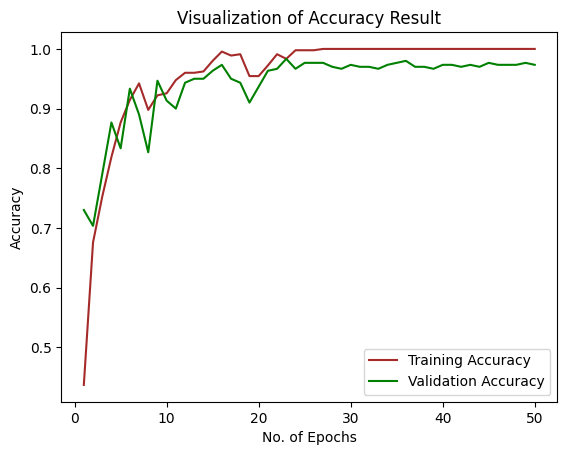

In [45]:
epochs = [ i for i in range(1,51)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()